In [3]:
from nansat import *
# define min/max longitude, latitude
lons = [-80, -50]
lats = [30,  50]

# access online data via OpenDAP
n1 = Nansat('sstcci_online:analysed_sst:2009-06-01', lons=lons, lats=lats)
n2 = Nansat('occci_online:8D:chlor_a:2009-06-01', lons=lons, lats=lats)

# get transects from points given by longitutde, latitude
t1 = n1.get_transect([[-64, -64], [40, 37]], ['analysed_sst'])
t2 = n2.get_transect([[-64, -64], [40, 37]], ['chlor_a'])

# fetch values from transect
sst_lat = t1['lat']
sst_val = t1['analysed_sst']
chl_lat = t2['lat']
chl_val = t2['chlor_a']

# plot
ax1 = plt.subplot()
ax1.plot(sst_lat, sst_val, '.-r')
ax1.set_xlabel('latitude')
ax1.set_ylabel('SST, K', color='r')
ax2 = ax1.twinx()
ax2.plot(chl_lat, chl_val, '.-g')
ax2.set_ylabel('CHL, mg m$^{-1}}$', color='g')
plt.savefig('chl_vs_sst.eps', dpi=150, pad_inches=0, bbox_inches='tight')
plt.close()

10:38:46|40|nansat|_get_mapper|GDAL could not open sstcci_online:analysed_sst:2009-06-01, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open sstcci_online:analysed_sst:2009-06-01, trying to read with Nansat mappers...
10:38:46|40|nansat|_get_mapper|GDAL could not open occci_online:8D:chlor_a:2009-06-01, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open occci_online:8D:chlor_a:2009-06-01, trying to read with Nansat mappers...


Get lon, lat
Get  2009-06-01 00:00:00 analysed_sst
from  ./ESACCI_L4_GHRSST_SSTdepth_OSTIA_GLOB_LT_v02.0_fv01.0.nc_analysed_sst_20090601_-079-050+030+049.tif ...
from  ./ESACCI_L4_GHRSST_SSTdepth_OSTIA_GLOB_LT_v02.0_fv01.0.nc_analysed_sst_20090601_-079-050+030+049.tif
Get lon, lat, time
Get  8D chlor_a
from  ./CCI_ALL-v2.0-8DAY_8D_chlor_a_20090602_-079-050+030+049.tif ...
from  ./CCI_ALL-v2.0-8DAY_8D_chlor_a_20090602_-079-050+030+049.tif


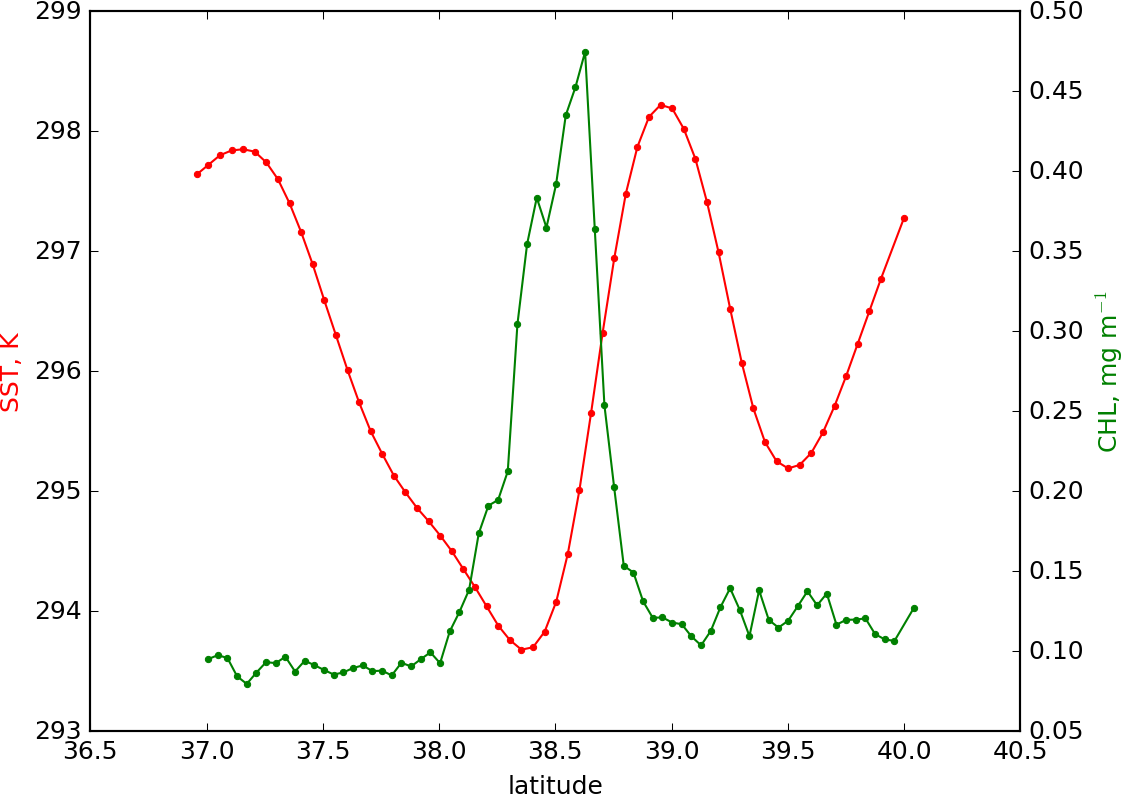

In [2]:
from IPython.core.display import Image
Image(filename='chl_vs_sst.png')